# Stress Detection Using ML

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the Dataset

In [56]:
df = pd.read_csv('data/merged.csv', index_col=0)
df.head(4)

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,ACC_x_mean,ACC_x_std,ACC_x_min,ACC_x_max,ACC_y_mean,ACC_y_std,...,age,height,weight,gender_ female,gender_ male,coffee_today_YES,sport_today_YES,smoker_NO,smoker_YES,feel_ill_today_YES
0,0.029937,0.009942,0.000000,0.087383,0.029510,0.011145,-0.024082,0.087383,0.000020,0.000008,...,27,175,80,0,1,0,0,1,0,0
1,0.021986,0.015845,0.000000,0.071558,0.017352,0.020817,-0.037843,0.071558,0.000012,0.000014,...,27,175,80,0,1,0,0,1,0,0
2,0.020839,0.011034,0.002752,0.054356,0.020839,0.011034,0.002752,0.054356,0.000014,0.000008,...,27,175,80,0,1,0,0,1,0,0
3,0.034449,0.003185,0.013761,0.040595,0.034449,0.003185,0.013761,0.040595,0.000024,0.000002,...,27,175,80,0,1,0,0,1,0,0


In [57]:
df.columns

Index(['net_acc_mean', 'net_acc_std', 'net_acc_min', 'net_acc_max',
       'ACC_x_mean', 'ACC_x_std', 'ACC_x_min', 'ACC_x_max', 'ACC_y_mean',
       'ACC_y_std', 'ACC_y_min', 'ACC_y_max', 'ACC_z_mean', 'ACC_z_std',
       'ACC_z_min', 'ACC_z_max', 'BVP_mean', 'BVP_std', 'BVP_min', 'BVP_max',
       'EDA_mean', 'EDA_std', 'EDA_min', 'EDA_max', 'EDA_phasic_mean',
       'EDA_phasic_std', 'EDA_phasic_min', 'EDA_phasic_max', 'EDA_smna_mean',
       'EDA_smna_std', 'EDA_smna_min', 'EDA_smna_max', 'EDA_tonic_mean',
       'EDA_tonic_std', 'EDA_tonic_min', 'EDA_tonic_max', 'Resp_mean',
       'Resp_std', 'Resp_min', 'Resp_max', 'TEMP_mean', 'TEMP_std', 'TEMP_min',
       'TEMP_max', 'BVP_peak_freq', 'TEMP_slope', 'subject', 'label', 'age',
       'height', 'weight', 'gender_ female', 'gender_ male',
       'coffee_today_YES', 'sport_today_YES', 'smoker_NO', 'smoker_YES',
       'feel_ill_today_YES'],
      dtype='object')

In [58]:
np.unique(df['label'])

array([0, 1, 2])

In [59]:
labels = {
    0: "Amused",
    1: "Neutral",
    2: "Stressed"
}

/tmp/ipykernel_620386/656284116.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('label', 1)


### Feature Selection

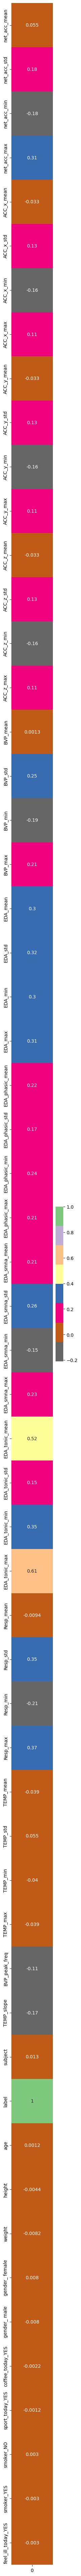

In [67]:
plt.figure(figsize=(2,100))
cor = df.corr()
n_targets = len(df.columns)
cor_target = cor['label'].values.reshape(n_targets, 1)
cor_features = cor['label'].keys()
ax = sns.heatmap(cor_target, annot=True, cmap=plt.cm.Accent_r)
ax.set_yticklabels(cor_features)
plt.show()

In [83]:
selected_feats =   [
    'BVP_mean', 'BVP_std', 'EDA_phasic_mean', 'EDA_phasic_min', 'EDA_smna_min', 
    'EDA_tonic_mean', 'Resp_mean', 'Resp_std', 'TEMP_mean', 'TEMP_std', 'TEMP_slope',
    'BVP_peak_freq', 'age', 'height', 'weight'
    ]

X = df[selected_feats]
y = df['label']

X.shape, y.shape

((1178, 15), (1178,))

## ML Model

In [124]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import tensorflow_probability as tfp

In [125]:
def get_train_and_test_splits(train_size, batch_size=1):
    # We prefetch with a buffer the same size as the dataset because th dataset
    # is very small and fits into memory.
    dataset = (
        tfds.load(name="wine_quality", as_supervised=True, split="train")
        .map(lambda x, y: (x, tf.cast(y, tf.float32)))
        .prefetch(buffer_size=dataset_size)
        .cache()
    )
    # We shuffle with a buffer the same size as the dataset.
    train_dataset = (
        dataset.take(train_size).shuffle(buffer_size=train_size).batch(batch_size)
    )
    test_dataset = dataset.skip(train_size).batch(batch_size)

    return train_dataset, test_dataset

dataset_size = 4898
batch_size = 256
train_size = int(dataset_size * 0.85)
train_dataset, test_dataset = get_train_and_test_splits(train_size, batch_size)


2022-11-11 00:55:54.147290: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/4898 [00:00<?, ? examples/s]

Shuffling /home/abhisinha08/tensorflow_datasets/wine_quality/white/1.0.0.incomplete67Y2P4/wine_quality-train.t…

Dataset wine_quality downloaded and prepared to /home/abhisinha08/tensorflow_datasets/wine_quality/white/1.0.0. Subsequent calls will reuse this data.


2022-11-11 00:56:04.186057: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-11 00:56:04.186093: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-11 00:56:04.186123: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (AbhiSinha08): /proc/driver/nvidia/version does not exist
2022-11-11 00:56:04.194528: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [139]:
hidden_units = [8, 8]
learning_rate = 0.001
num_epochs = 1000
train_size = 1060


def run_experiment(model, loss, train_dataset, test_dataset):

    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
        loss=loss,
        metrics=[keras.metrics.RootMeanSquaredError()],
    )

    print("Start training the model...")
    model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)
    print("Model training finished.")
    _, rmse = model.evaluate(train_dataset, verbose=0)
    print(f"Train RMSE: {round(rmse, 3)}")

    print("Evaluating model performance...")
    _, rmse = model.evaluate(test_dataset, verbose=0)
    print(f"Test RMSE: {round(rmse, 3)}")


In [140]:
FEATURE_NAMES = selected_feats

FEATURE_NAMES = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
]


def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        inputs[feature_name] = layers.Input(
            name=feature_name, shape=(1,), dtype=tf.float32
        )
    return inputs

In [141]:
# Define the prior weight distribution as Normal of mean=0 and stddev=1.
# Note that, in this example, the we prior distribution is not trainable,
# as we fix its parameters.
def prior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    prior_model = keras.Sequential(
        [
            tfp.layers.DistributionLambda(
                lambda t: tfp.distributions.MultivariateNormalDiag(
                    loc=tf.zeros(n), scale_diag=tf.ones(n)
                )
            )
        ]
    )
    return prior_model


# Define variational posterior weight distribution as multivariate Gaussian.
# Note that the learnable parameters for this distribution are the means,
# variances, and covariances.
def posterior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    posterior_model = keras.Sequential(
        [
            tfp.layers.VariableLayer(
                tfp.layers.MultivariateNormalTriL.params_size(n), dtype=dtype
            ),
            tfp.layers.MultivariateNormalTriL(n),
        ]
    )
    return posterior_model


In [142]:
def create_probablistic_bnn_model(train_size):
    inputs = create_model_inputs()
    features = keras.layers.concatenate(list(inputs.values()))
    features = layers.BatchNormalization()(features)

    # Create hidden layers with weight uncertainty using the DenseVariational layer.
    for units in hidden_units:
        features = tfp.layers.DenseVariational(
            units=units,
            make_prior_fn=prior,
            make_posterior_fn=posterior,
            kl_weight=1 / train_size,
            activation="sigmoid",
        )(features)

    # Create a probabilisticå output (Normal distribution), and use the `Dense` layer
    # to produce the parameters of the distribution.
    # We set units=2 to learn both the mean and the variance of the Normal distribution.
    distribution_params = layers.Dense(units=2)(features)
    outputs = tfp.layers.IndependentNormal(1)(distribution_params)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [143]:
def negative_loglikelihood(targets, estimated_distribution):
    return -estimated_distribution.log_prob(targets)


prob_bnn_model = create_probablistic_bnn_model(train_size)
# run_experiment(prob_bnn_model, negative_loglikelihood, train_dataset, test_dataset)
run_experiment(prob_bnn_model, negative_loglikelihood, train_dataset, test_dataset)

Start training the model...
Epoch 1/1000
17/17 [==============================] - 3s 52ms/step - loss: 22.0592 - root_mean_squared_error: 6.4553 - val_loss: 17.3151 - val_root_mean_squared_error: 5.9902
Epoch 2/1000
17/17 [==============================] - 0s 6ms/step - loss: 19.2091 - root_mean_squared_error: 6.2107 - val_loss: 19.0591 - val_root_mean_squared_error: 6.0004
Epoch 3/1000
17/17 [==============================] - 0s 7ms/step - loss: 15.5830 - root_mean_squared_error: 6.1612 - val_loss: 16.8756 - val_root_mean_squared_error: 6.5041
Epoch 4/1000
17/17 [==============================] - 0s 6ms/step - loss: 16.6741 - root_mean_squared_error: 6.1794 - val_loss: 12.1155 - val_root_mean_squared_error: 5.9963
Epoch 5/1000
17/17 [==============================] - 0s 7ms/step - loss: 14.4952 - root_mean_squared_error: 6.1491 - val_loss: 10.6693 - val_root_mean_squared_error: 5.9487
Epoch 6/1000
17/17 [==============================] - 0s 6ms/step - loss: 11.6522 - root_mean_squared

In [ ]:
prediction_distribution = prob_bnn_model(examples)
prediction_mean = prediction_distribution.mean().numpy().tolist()
prediction_stdv = prediction_distribution.stddev().numpy()

# The 95% CI is computed as mean ± (1.96 * stdv)
upper = (prediction_mean + (1.96 * prediction_stdv)).tolist()
lower = (prediction_mean - (1.96 * prediction_stdv)).tolist()
prediction_stdv = prediction_stdv.tolist()

for idx in range(sample):
    print(
        f"Prediction mean: {round(prediction_mean[idx][0], 2)}, "
        f"stddev: {round(prediction_stdv[idx][0], 2)}, "
        f"95% CI: [{round(upper[idx][0], 2)} - {round(lower[idx][0], 2)}]"
        f" - Actual: {targets[idx]}"
    )